In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Loading the dataset

In [5]:
columns=['sepal length','sepal width','petal length','petal width','class_labels']
#load data
df=pd.read_csv('irisnew.csv',names=columns)
df.head()




,sepal length,sepal width,petal length,petal width,class_labels
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Visualisation

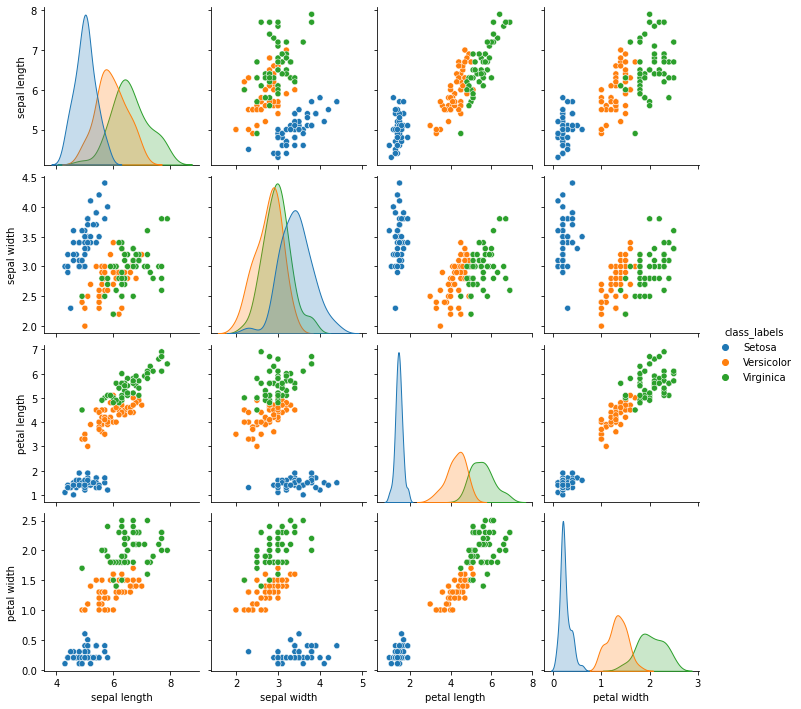

In [6]:
sns.pairplot(df,hue='class_labels')


In [ ]:
'''Analysing the the above pairplots we can conclude that the graph having Y axis--(petal length)and 
  X axis--(petal width) is the best plot for further model analysis becauses all the data points are almost
  sperated well and thus the ML algorithm can be set easily'''

In [5]:
#Spliting the data into testing and training data

In [7]:
data=df.values
X=data[:,0:4]
Y=data[:,4]
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

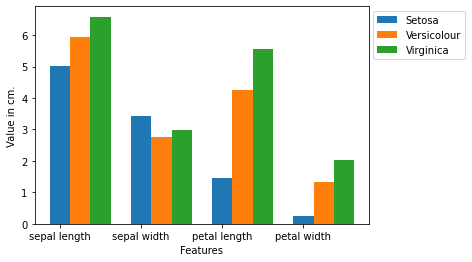

In [8]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [8]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [15]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)
#Thus we have succesfully trained the ML model and now is the step to test the model using the data different than
#the tabular dataset 

1.0

In [14]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
import numpy as np
X_new = np.array([[3, 2, 1, 5], [  4.9, 1.8, 1.8, 1.6 ], [  1.4, 2.1, 2.7, 2.3 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Setosa' 'Versicolor' 'Setosa']


In [ ]:
"""Thus we succesfully predicted for the species using the random dataset"""

In [ ]:
#The above table is produced using sklearn's classification_report library 
#This table gives the details like precision(net  positive outcomes out of the total positive ones ),recall
#(net positive outcomes out of total outcomes), f1 score(the combined mean for precision and recall)
#for any data the precision is lower if recall value is higher 
